### Часть 2
Используя скаченные данные и `Pandas` (или `PySpark`) посчитайте:
- явку (%) по всем ТИК, результат отсортировать по убыванию
- выберите произвольного кандидата и найдите тот избиратльный участок, на котором он получил наибольший результат  (%, учитывать участки на которых проголосовало больше 100 человек)
- найдите ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна
- посчитайте дисперсию по явке для каждого ТИК (учитывать УИК)
- для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат
- визуализируйте отношение - явка на УИК $\rightarrow$ результат кандидата. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/election_data.csv").drop(columns="Unnamed: 0")
df

,ТИК №,УИК №,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна
0,Территориальная избирательная комиссия №1,УИК №1,1803,1200,587,11,602,11,587,23,575,0,0,110,345,120
1,Территориальная избирательная комиссия №1,УИК №2,1466,1100,433,14,653,14,430,19,425,0,0,53,326,46
2,Территориальная избирательная комиссия №1,УИК №3,2092,1600,576,22,1002,22,576,15,583,0,0,155,332,96
3,Территориальная избирательная комиссия №1,УИК №4,1056,1000,318,4,678,4,318,13,309,0,0,67,171,71
4,Территориальная избирательная комиссия №1,УИК №5,1827,1400,495,8,897,8,493,16,485,0,0,137,266,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Территориальная избирательная комиссия №30,УИК №2350,284,300,166,53,81,53,166,0,219,0,0,21,184,14
2017,Территориальная избирательная комиссия №30,УИК №2351,132,150,86,27,37,27,86,2,111,0,0,7,91,13
2018,Территориальная избирательная комиссия №30,УИК №2352,320,350,217,23,110,23,217,4,236,0,0,20,193,23
2019,Территориальная избирательная комиссия №30,УИК №2355,485,500,335,12,153,12,335,2,345,0,0,23,290,32


### явка

In [3]:
df["Всего бюллетеней"] = df["Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования"] + df["Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования"]
df["Явка, %"] = df["Всего бюллетеней"] / df["Число избирателей, внесенных в список избирателей на момент окончания голосования"] * 100

df.sort_values("Явка, %", ascending=False, inplace=True)
df

,ТИК №,УИК №,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллетеней,"Явка, %"
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,100.000000
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,100.000000
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,100.000000
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,100.000000
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Территориальная избирательная комиссия №5,УИК №1424,1814,1700,320,1,1379,1,320,6,315,0,0,45,225,45,321,17.695700
475,Территориальная избирательная комиссия №6,УИК №1139,1848,1500,317,3,1180,3,317,10,310,0,0,53,186,71,320,17.316017
1756,Территориальная избирательная комиссия №26,УИК №1215,1959,2000,331,8,1661,8,331,9,330,0,0,62,194,74,339,17.304747
647,Территориальная избирательная комиссия №10,УИК №203,859,800,143,1,656,1,143,7,137,0,0,37,71,29,144,16.763679


### чекаем кандидата (участки с > 100 голосами)

In [4]:
candidate = "Беглов Александр Дмитриевич"

In [5]:
df[f"{candidate}, %"] = 0
df.loc[df["Всего бюллетеней"] >= 100, f"{candidate}, %"] = df[f"{candidate}"] / df["Всего бюллетеней"] * 100
df

,ТИК №,УИК №,"Число избирателей, внесенных в список избирателей на момент окончания голосования","Число избирательных бюллетеней, полученных участковой избирательной комиссией","Число избирательных бюллетеней, выданных избирателям в помещении для голосования в день голосования","Число избирательных бюллетеней, выданных избирателям, проголосовавшим вне помещения для голосования",Число погашенных избирательных бюллетеней,"Число избирательных бюллетеней, содержащихся в переносных ящиках для голосования","Число избирательных бюллетеней, содержащихся в стационарных ящиках для голосования",Число недействительных избирательных бюллетеней,Число действительных избирательных бюллетеней,Число утраченных избирательных бюллетеней,"Число избирательных бюллетеней, не учтенных при получении",Амосов Михаил Иванович,Беглов Александр Дмитриевич,Тихонова Надежда Геннадьевна,Всего бюллетеней,"Явка, %","Беглов Александр Дмитриевич, %"
972,Территориальная избирательная комиссия №15,УИК №2293,203,300,151,52,97,52,151,10,193,0,0,20,142,31,203,100.000000,69.950739
1458,Территориальная избирательная комиссия №22,УИК №408,201,500,120,81,299,81,120,9,192,0,0,17,140,35,201,100.000000,69.651741
1095,Территориальная избирательная комиссия №17,УИК №2284,235,500,235,0,265,0,235,11,224,0,0,17,165,42,235,100.000000,70.212766
1377,Территориальная избирательная комиссия №21,УИК №2343,76,200,63,13,124,13,63,1,75,0,0,8,64,3,76,100.000000,0.000000
1969,Территориальная избирательная комиссия №29,УИК №2178,126,500,126,0,374,0,126,0,126,0,0,12,114,0,126,100.000000,90.476190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Территориальная избирательная комиссия №5,УИК №1424,1814,1700,320,1,1379,1,320,6,315,0,0,45,225,45,321,17.695700,70.093458
475,Территориальная избирательная комиссия №6,УИК №1139,1848,1500,317,3,1180,3,317,10,310,0,0,53,186,71,320,17.316017,58.125000
1756,Территориальная избирательная комиссия №26,УИК №1215,1959,2000,331,8,1661,8,331,9,330,0,0,62,194,74,339,17.304747,57.227139
647,Территориальная избирательная комиссия №10,УИК №203,859,800,143,1,656,1,143,7,137,0,0,37,71,29,144,16.763679,49.305556


### ТИК, где разница между УИК с наибольшей явкой и наименьшей максимальна

In [6]:
(df.groupby("ТИК №")["Явка, %"].max() - df.groupby("ТИК №")["Явка, %"].min()).sort_values(ascending=False)

ТИК №
Территориальная избирательная комиссия №17    82.041969
Территориальная избирательная комиссия №19    81.630435
Территориальная избирательная комиссия №28    81.274573
Территориальная избирательная комиссия №11    81.144708
Территориальная избирательная комиссия №26    81.030972
Территориальная избирательная комиссия №5     80.688501
Территориальная избирательная комиссия №4     80.524017
Территориальная избирательная комиссия №8     80.472103
Территориальная избирательная комиссия №27    80.043466
Территориальная избирательная комиссия №21    79.854369
Территориальная избирательная комиссия №2     79.704301
Территориальная избирательная комиссия №20    79.555135
Территориальная избирательная комиссия №23    79.255354
Территориальная избирательная комиссия №22    79.013046
Территориальная избирательная комиссия №29    78.865784
Территориальная избирательная комиссия №1     77.026424
Территориальная избирательная комиссия №30    74.678918
Территориальная избирательная комиссия №13

### дисперсия по явке для каждого ТИК (учитывать УИК)

In [7]:
df.groupby("ТИК №")["Явка, %"].var().sort_values(ascending=False)

ТИК №
Территориальная избирательная комиссия №23    590.751986
Территориальная избирательная комиссия №30    522.212852
Территориальная избирательная комиссия №2     461.722595
Территориальная избирательная комиссия №22    451.459408
Территориальная избирательная комиссия №15    416.225903
Территориальная избирательная комиссия №13    393.523748
Территориальная избирательная комиссия №28    391.629141
Территориальная избирательная комиссия №17    330.702941
Территориальная избирательная комиссия №21    310.054919
Территориальная избирательная комиссия №24    272.645679
Территориальная избирательная комиссия №8     260.038191
Территориальная избирательная комиссия №29    241.879495
Территориальная избирательная комиссия №11    240.488191
Территориальная избирательная комиссия №18    240.450355
Территориальная избирательная комиссия №4     222.966719
Территориальная избирательная комиссия №26    220.178568
Территориальная избирательная комиссия №27    206.548446
Территориальная избирател

### для каждого кандидата посчитайте таблицу: результат (%, округленный до целого) - количество УИК, на которых кандидат получил данный результат


In [8]:
print(candidate)
df[f"{candidate}, целый %"] = np.round(df[f"{candidate}, %"])
counts = df.groupby(f"{candidate}, целый %").count()["УИК №"]

for percent, count in zip(counts.index, counts):
    print(f"{percent}: {count}")

Беглов Александр Дмитриевич
0.0: 15
30.0: 1
32.0: 1
33.0: 2
38.0: 3
39.0: 3
40.0: 3
41.0: 5
42.0: 3
43.0: 3
44.0: 8
45.0: 8
46.0: 10
47.0: 20
48.0: 14
49.0: 24
50.0: 27
51.0: 37
52.0: 37
53.0: 44
54.0: 36
55.0: 52
56.0: 62
57.0: 68
58.0: 77
59.0: 79
60.0: 122
61.0: 93
62.0: 92
63.0: 96
64.0: 89
65.0: 79
66.0: 82
67.0: 73
68.0: 77
69.0: 61
70.0: 72
71.0: 48
72.0: 53
73.0: 40
74.0: 37
75.0: 37
76.0: 28
77.0: 21
78.0: 19
79.0: 20
80.0: 20
81.0: 24
82.0: 13
83.0: 14
84.0: 14
85.0: 9
86.0: 7
87.0: 7
88.0: 5
89.0: 5
90.0: 6
91.0: 6
92.0: 2
93.0: 1
94.0: 3
95.0: 1
96.0: 1
98.0: 2


### визуализируйте отношение - явка на УИК  →  результат кандидата.

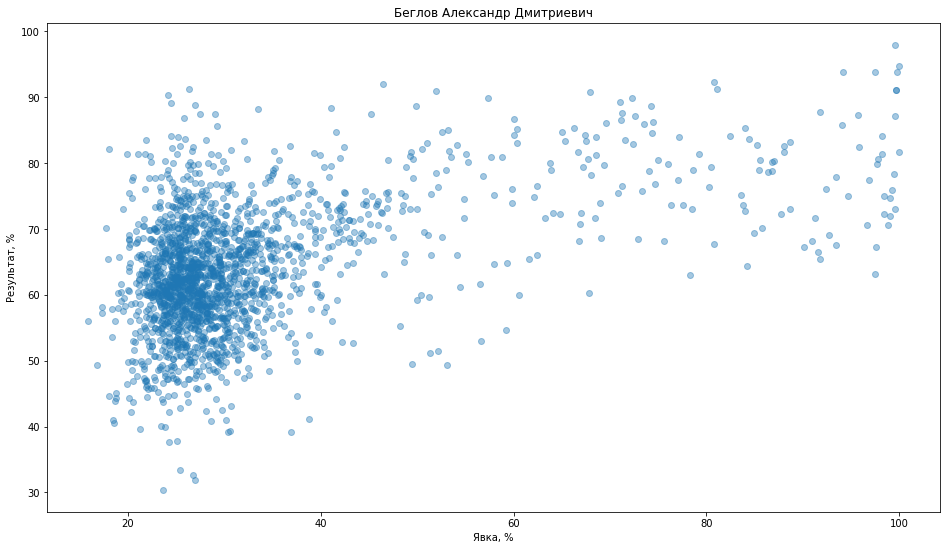

In [9]:
buf = df.loc[df[f"{candidate}, %"] != 0].groupby("Явка, %")[f"{candidate}, %"].mean()

x = buf.index
y = buf.values

plt.figure(figsize=(16, 9))
plt.title(candidate)
plt.scatter(x, y, alpha=0.4)
plt.xlabel("Явка, %")
plt.ylabel("Результат, %")
plt.show()